## Задание

1. Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями
2. Добавьте первые разности по стоимости доллара и евро к рублю
3. сделайте ее перрасчет (ресемплинг) в представление по неделям. 
4. Постройте модель предсказания 1-й точки от текущей (h=1).

5. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os


import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

C:\Users\ashabalin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

scl=StandardScaler()

from sklearn.cluster import KMeans, DBSCAN

In [3]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
data,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [4]:
brent_data.tail(10)

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
data,,,,,,,,,,,
2019-08-21,60.38,2019,8,21,3,233,34,2,0,0,0
2019-08-22,60.05,2019,8,22,3,234,34,3,0,0,0
2019-08-23,58.94,2019,8,23,3,235,34,4,0,0,0
2019-08-25,57.81,2019,8,25,3,237,34,6,0,0,0
2019-08-26,58.26,2019,8,26,3,238,35,0,0,0,0
2019-08-27,59.59,2019,8,27,3,239,35,1,0,0,0
2019-08-28,59.84,2019,8,28,3,240,35,2,0,0,0
2019-08-29,60.37,2019,8,29,3,241,35,3,0,0,0
2019-08-30,59.19,2019,8,30,3,242,35,4,0,0,0


In [5]:
brent_data.shape

(2667, 11)

In [6]:
rub_doll=pd.read_excel('usd_F01_09_2010_T03_06_2020.xlsx', index_col=[1], parse_dates=[0] )
rub_doll.tail(10)

,nominal,curs,cdx
data,,,
2020-05-21,1,72.3381,Доллар США
2020-05-22,1,70.9240,Доллар США
2020-05-23,1,71.8804,Доллар США
2020-05-26,1,71.5962,Доллар США
2020-05-27,1,71.1408,Доллар США
2020-05-28,1,71.0635,Доллар США
2020-05-29,1,71.1012,Доллар США
2020-05-30,1,70.7520,Доллар США
2020-06-02,1,69.7114,Доллар США


In [7]:
rub_doll = rub_doll.loc[rub_doll.index.get_level_values('data') <= '2019-09-01']
rub_doll.tail(10)

,nominal,curs,cdx
data,,,
2019-08-20,1,66.6082,Доллар США
2019-08-21,1,66.7840,Доллар США
2019-08-22,1,66.2630,Доллар США
2019-08-23,1,65.6196,Доллар США
2019-08-24,1,65.6046,Доллар США
2019-08-27,1,65.9735,Доллар США
2019-08-28,1,66.2608,Доллар США
2019-08-29,1,66.4127,Доллар США
2019-08-30,1,66.7471,Доллар США


In [8]:
rub_e=pd.read_excel('eur_F01_09_2010_T03_06_2020.xlsx', index_col=[1], parse_dates=[0])
rub_e = rub_e.loc[rub_e.index.get_level_values('data') <= '2019-09-01']
rub_e.tail(10)

,nominal,curs,cdx
data,,,
2019-08-20,1,73.9484,Евро
2019-08-21,1,73.9766,Евро
2019-08-22,1,73.4989,Евро
2019-08-23,1,72.8312,Евро
2019-08-24,1,72.6243,Евро
2019-08-27,1,73.3955,Евро
2019-08-28,1,73.6091,Евро
2019-08-29,1,73.6583,Евро
2019-08-30,1,73.9558,Евро


Есть расхождения в размерности данных. У валюты пропущены воскресенья и понедельники, 
а в нефти отсутсвуют субботы.
С этим надо что-то сделать, иначе модель будет некорректная. Данные цены нефти и курсов  не будут соответствовать своим датам.
Объединим данные в одни датасет. Но для начала подготовим датасеты доллар и евро


In [9]:
rub_doll.drop(['nominal','cdx'], axis=1,inplace = True)
rub_e.drop(['nominal','cdx'], axis=1,inplace = True)

In [10]:
rub_doll.columns = ['doll']
rub_e.columns = ['euro']
val = rub_doll.merge(rub_e, on='data')
val.head()

,doll,euro
data,,
2010-09-01,30.8669,39.0127
2010-09-02,30.8001,39.1654
2010-09-03,30.6858,39.2901
2010-09-04,30.6922,39.3505
2010-09-07,30.5771,39.4720


In [11]:
data = brent_data.merge(val, how='left', on='data')
data.tail(10)

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,doll,euro
data,,,,,,,,,,,,,
2019-08-21,60.38,2019,8,21,3,233,34,2,0,0,0,66.7840,73.9766
2019-08-22,60.05,2019,8,22,3,234,34,3,0,0,0,66.2630,73.4989
2019-08-23,58.94,2019,8,23,3,235,34,4,0,0,0,65.6196,72.8312
2019-08-25,57.81,2019,8,25,3,237,34,6,0,0,0,NaN,NaN
2019-08-26,58.26,2019,8,26,3,238,35,0,0,0,0,NaN,NaN
2019-08-27,59.59,2019,8,27,3,239,35,1,0,0,0,65.9735,73.3955
2019-08-28,59.84,2019,8,28,3,240,35,2,0,0,0,66.2608,73.6091
2019-08-29,60.37,2019,8,29,3,241,35,3,0,0,0,66.4127,73.6583
2019-08-30,59.19,2019,8,30,3,242,35,4,0,0,0,66.7471,73.9558


In [12]:
#заполним пропуски данных по валюте соседними значениями
brent_data = data.fillna(method='ffill')
brent_data.tail(10)


,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,doll,euro
data,,,,,,,,,,,,,
2019-08-21,60.38,2019,8,21,3,233,34,2,0,0,0,66.7840,73.9766
2019-08-22,60.05,2019,8,22,3,234,34,3,0,0,0,66.2630,73.4989
2019-08-23,58.94,2019,8,23,3,235,34,4,0,0,0,65.6196,72.8312
2019-08-25,57.81,2019,8,25,3,237,34,6,0,0,0,65.6196,72.8312
2019-08-26,58.26,2019,8,26,3,238,35,0,0,0,0,65.6196,72.8312
2019-08-27,59.59,2019,8,27,3,239,35,1,0,0,0,65.9735,73.3955
2019-08-28,59.84,2019,8,28,3,240,35,2,0,0,0,66.2608,73.6091
2019-08-29,60.37,2019,8,29,3,241,35,3,0,0,0,66.4127,73.6583
2019-08-30,59.19,2019,8,30,3,242,35,4,0,0,0,66.7471,73.9558


Вот теперь общий датасет заполнен верными значениями. Сделаем ресемплинг по неделям

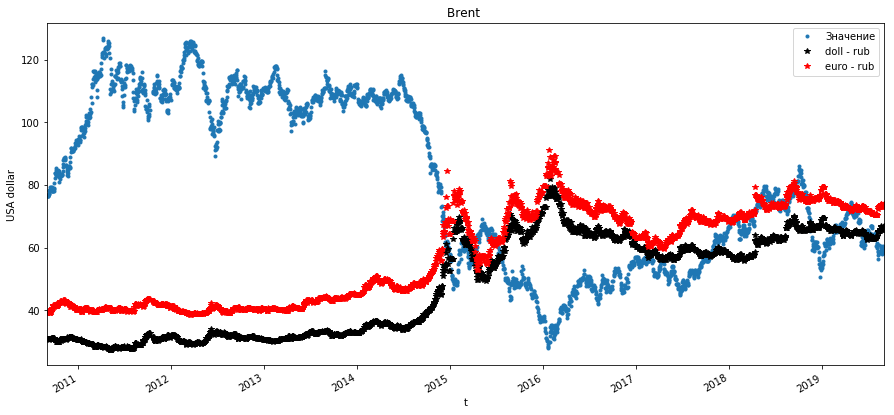

In [13]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.plot(brent_data.index,brent_data['doll'].values,'*k', label='doll - rub')
plt.plot(brent_data.index,brent_data['euro'].values,'*r', label='euro - rub')
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.legend()
plt.show()

Построим первые разности

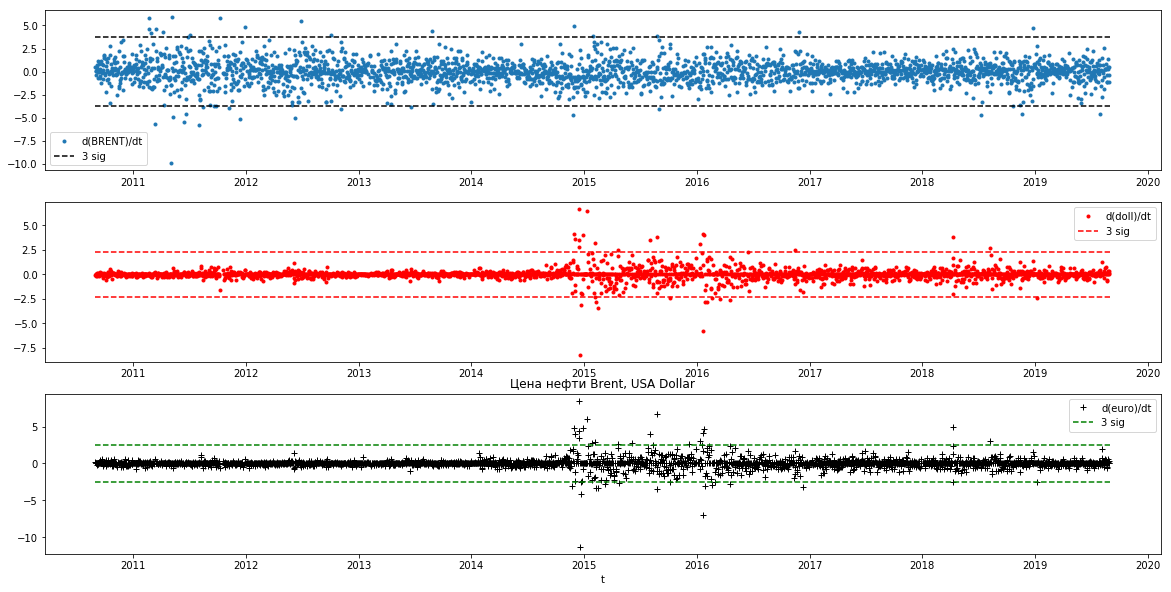

In [14]:
d_brent_data = brent_data['Значение'].values[1:]- brent_data['Значение'].values[:-1]
s_brent = np.std(d_brent_data) *3

d_rub_doll = brent_data['doll'].values[1:]- brent_data['doll'].values[:-1]
s_rub = np.std(d_rub_doll)**0.5 *3

d_rub_e = brent_data['euro'].values[1:]- brent_data['euro'].values[:-1]
s_rube = np.std(d_rub_e)**0.5 *3

plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.plot(brent_data.iloc[:-1].index,d_brent_data,'.', label='d(BRENT)/dt')
plt.plot(brent_data.iloc[[0,-1]].index,[s_brent, s_brent],'--k',label ='3 sig')
plt.plot(brent_data.iloc[[0,-1]].index,[-s_brent, -s_brent],'--k')
plt.legend()

plt.subplot(3,1,2)
plt.plot(brent_data.iloc[:-1].index,d_rub_doll,'.r', label='d(doll)/dt')
plt.plot(brent_data.iloc[[0,-1]].index,[s_rub, s_rub],'--r',label ='3 sig')
plt.plot(brent_data.iloc[[0,-1]].index,[-s_rub, -s_rub],'--r')
plt.legend()

plt.subplot(3,1,3)
plt.plot(brent_data.iloc[:-1].index,d_rub_e,'+k', label='d(euro)/dt')
plt.plot(brent_data.iloc[[0,-1]].index,[s_rube, s_rube],'--g',label ='3 sig')
plt.plot(brent_data.iloc[[0,-1]].index,[-s_rube, -s_rube],'--g')

plt.xlabel('t')
plt.legend()
plt.title('Цена нефти Brent, USA Dollar')
plt.show()

ind_anomal_brent = np.where( abs(d_brent_data)>s_brent)[0]
ind_anomal_rubl_d = np.where( abs(d_rub_doll)>s_rub)[0]
ind_anomal_rubl_e = np.where( abs(d_rub_e)>s_rube)[0]

Добавим признаков

In [15]:
p =3

#добавляем историю длиной р
for i in range(p):
    brent_data['t'+str(p-i+1)]=0
    brent_data['t'+str(p-i+1)].values[p+2:] = brent_data['Значение'].values[i+1:-(p-i+1)]

# добавим разности - 
for i in range(p):
    # нефти
    brent_data['d_b'+str(p-i+1)]=0    
    brent_data['d_b'+str(p-i+1)].values[i+1:] =( (brent_data['Значение'].values[i+1:]- brent_data['Значение'].values[i:-1]))
    
    # доллара
    brent_data['d_d'+str(p-i+1)]=0    
    brent_data['d_d'+str(p-i+1)].values[i+1:] =( (brent_data['doll'].values[i+1:]- brent_data['doll'].values[i:-1]))
    
    # евро
    brent_data['d_e'+str(p-i+1)]=0    
    brent_data['d_e'+str(p-i+1)].values[i+1:] =( (brent_data['euro'].values[i+1:]- brent_data['euro'].values[i:-1]))



In [16]:

X = brent_data.iloc[p+2:,:].values

Xscale = scl.fit_transform(X)

clast = DBSCAN(eps=2.9, leaf_size=1, min_samples = 3)
X_scale_clast =clast.fit_predict(Xscale)


первый элемент кластера 0  :  [-0.17721153 -1.75698575  0.72500659 -1.11065221  0.44539858  0.63193593
  0.63776124 -1.33798808  5.91379514 -0.16553715 -0.17488451 -1.0861488
 -1.21075629 -0.19246036 -0.19219421 -0.19194461  0.00947192 -0.01918824
 -0.00820283  0.00947192 -0.01918824 -0.00820283  0.00947192 -0.01918824
 -0.00820283]
Число кластеров с масштабированием:  23
Число не кластеров:  97


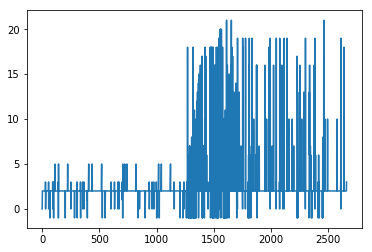

In [17]:
# тут нгадо разобратиься что к чему.
ind_= np.where(X_scale_clast !=-1)[0]
print('первый элемент кластера',X_scale_clast[ind_[0]],' : ',clast.components_[0])
print('Число кластеров с масштабированием: ',len(np.unique(X_scale_clast)-1))

n_noise = list(clast.labels_).count(-1)

print('Число не кластеров: ',n_noise)

plt.plot(X_scale_clast)
plt.show()

In [18]:
# Сделаем ресемплинг на недели и удалим неактуальные данные
brent_data_w = brent_data.copy().resample('W').mean()
brent_data_w.drop(['dayofmonth','dayofyear','dayofweek', 'is_next_holiday'], axis=1,inplace = True)
brent_data_w.head()

,Значение,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,doll,euro,t4,...,t2,d_b4,d_d4,d_e4,d_b3,d_d3,d_e3,d_b2,d_d2,d_e2
data,,,,,,,,,,,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,35.0,0.000000,0.2,30.747440,39.233840,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2010-09-12,77.673333,2010.0,9.000000,3.000000,36.0,0.166667,0.0,30.777050,39.302883,76.166667,...,76.500000,0.166667,0.0,0.0,0.166667,0.0,0.0,0.166667,0.0,0.0
2010-09-19,78.693333,2010.0,9.000000,3.000000,37.0,0.000000,0.0,30.844500,39.764250,78.000000,...,78.500000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2010-09-26,78.518333,2010.0,9.000000,3.000000,38.0,0.000000,0.0,31.012233,40.967983,78.166667,...,77.666667,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2010-10-03,81.211667,2010.0,9.333333,3.333333,39.0,0.000000,0.0,30.607417,41.345817,77.666667,...,79.000000,0.500000,0.0,0.0,0.500000,0.0,0.0,0.500000,0.0,0.0


In [19]:
#Поскольку далее получал ошибку - нашел, что при ресемплинге одна неделя почему-то получилась ощибочной. Надо разбираться.
brent_data_w.iloc[57:60,:]

,Значение,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,doll,euro,t4,...,t2,d_b4,d_d4,d_e4,d_b3,d_d3,d_e3,d_b2,d_d2,d_e2
data,,,,,,,,,,,,,,,,,,,,,
2011-10-09,103.476667,2011.0,10.0,4.0,40.0,0.0,0.166667,32.466400,43.367483,101.833333,...,101.833333,0.333333,0.000000,0.0,0.333333,0.000000,0.0,0.333333,0.000000,0.0
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-23,109.756667,2011.0,10.0,4.0,42.0,0.0,0.000000,31.227767,42.893333,104.000000,...,106.000000,1.666667,-0.333333,0.0,1.666667,-0.333333,0.0,1.666667,-0.333333,0.0


In [20]:
# В данный момент пока просто удалим эти данные.
d1 = brent_data_w.iloc[:58,:]
d2 = brent_data_w.iloc[59:,:]

brent_data_w = pd.concat([d1, d2])
brent_data_w.iloc[57:60,:]

,Значение,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,doll,euro,t4,...,t2,d_b4,d_d4,d_e4,d_b3,d_d3,d_e3,d_b2,d_d2,d_e2
data,,,,,,,,,,,,,,,,,,,,,
2011-10-09,103.476667,2011.0,10.0,4.0,40.0,0.0,0.166667,32.466400,43.367483,101.833333,...,101.833333,0.333333,0.000000,0.0,0.333333,0.000000,0.0,0.333333,0.000000,0.0
2011-10-23,109.756667,2011.0,10.0,4.0,42.0,0.0,0.000000,31.227767,42.893333,104.000000,...,106.000000,1.666667,-0.333333,0.0,1.666667,-0.333333,0.0,1.666667,-0.333333,0.0
2011-10-30,110.680000,2011.0,10.0,4.0,43.0,0.0,0.000000,30.626467,42.593517,108.833333,...,110.166667,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


## Выделение существенных признаков
Запишем итоговую систему признаков и проведем ее анализ. Горизонт прогнозирования h = 1, тогда target = y(t+h)=y(t+1)

In [21]:
scl_target=StandardScaler() 

h=1
target = brent_data_w["Значение"].values[h:].reshape((brent_data_w.shape[0]-h,1))
y = scl_target.fit_transform(target.astype('float64'))
y.shape

(468, 1)

In [22]:
scl_x=StandardScaler() 

X = brent_data_w.iloc[:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(468, 21)

In [23]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression


In [24]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(468, 5)

In [25]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(468, 2)

In [26]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(468, 2)

In [27]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0  7  9 10 11]
Номера признаков лучших признаков по процентной форме:  [ 0 11]
Номера признаков для выбора по модели :  [ 0 11]


In [28]:
#Признак с евро (8) не попал в список :)
X_new = X[:,[0,7,9,10,11]]

## Разделение данных на тестовые и тренировочные 

In [29]:
# сделаем функцию
def split_data( data, split_date ):
    return data.iloc[:split_date,:].copy(), \
           data.iloc[split_date:,:].copy()

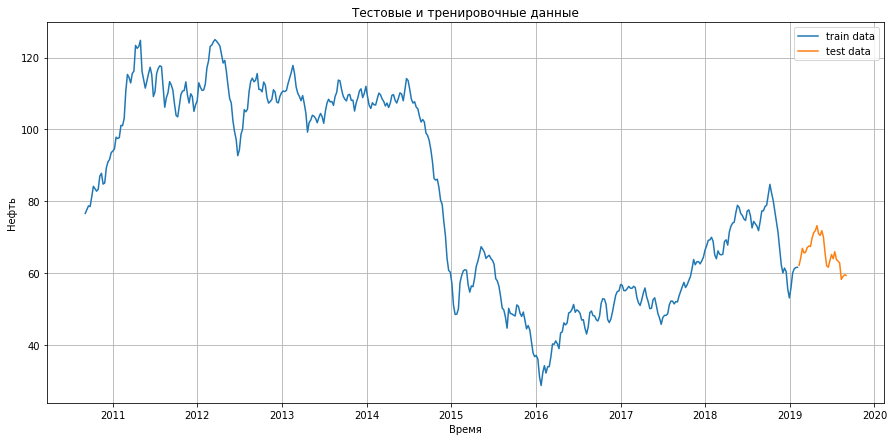

In [30]:
train, test = split_data( brent_data_w, -30)

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Нефть')
plt.plot(train.index,train.iloc[:,0], label='train data' )
plt.plot(test.index,test.iloc[:,0], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.grid()
plt.legend()
plt.show()

In [31]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [32]:
train.shape

(439, 21)

# Строим Модель

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [34]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=10, n_estimators=1000)
model_l = LinearRegression()

In [35]:
model_l.fit( X_train, y_train )
model_g.fit( X_train, y_train ) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=10, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
X_test.shape

(29, 5)

In [37]:
y_pred_g = model_g.predict(X_train)
y_pred_l= model_l.predict(X_train)

y_test_pred_g = model_g.predict(X_test)
y_test_pred_l= model_l.predict(X_test)

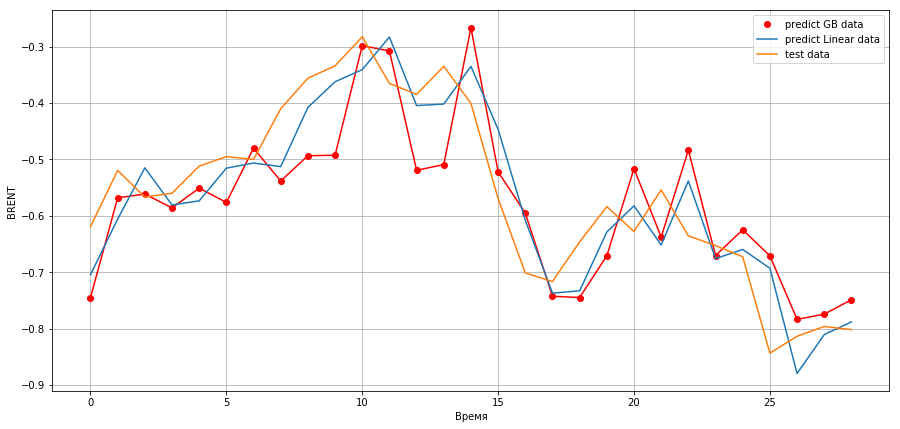

In [38]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g[:30],'or', label='predict GB data' )
plt.plot(y_test_pred_g[:30],'r' )
plt.plot(y_test_pred_l[:30], label='predict Linear data' )
plt.plot(y_test[:30], label='test data')
plt.grid()
plt.legend()
plt.show()

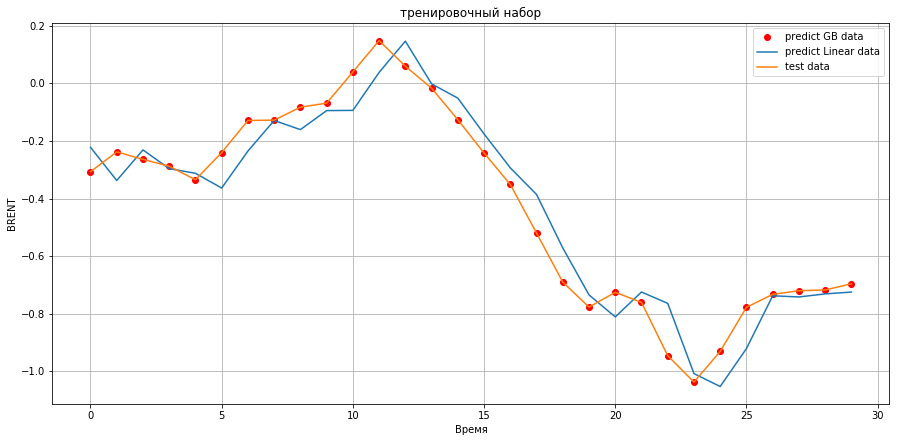

In [39]:
plt.figure( figsize=( 15, 7 ))

plt.title('тренировочный набор')
plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_pred_g[-30:],'or', label='predict GB data' )
plt.plot(y_pred_l[-30:], label='predict Linear data' )
plt.plot(y_train[-30:], label='test data')
plt.grid()
plt.legend()
plt.show()

In [40]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [41]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   3.253692018396923 %


In [42]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,1,4,5, 7], 
              "n_estimators":[100,200,300,400,500, 1000, 1200]}

#  randomized search
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.654 (std: 0.366)
Parameters: {'n_estimators': 300, 'max_depth': 5}

Model with rank: 2
Mean validation score: 0.652 (std: 0.365)
Parameters: {'n_estimators': 500, 'max_depth': 5}

Model with rank: 3
Mean validation score: 0.646 (std: 0.337)
Parameters: {'n_estimators': 300, 'max_depth': 1}



In [43]:
model_g_best = GradientBoostingRegressor(max_depth=1,  n_estimators=400)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   2.780866154597357 %


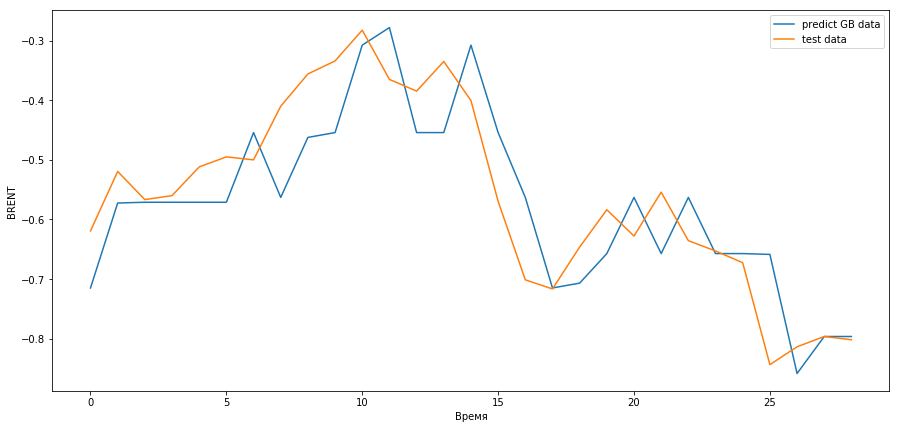

In [44]:

plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g, label='predict GB data' )
plt.plot(y_test, label='test data')

plt.legend()
plt.show()

In [45]:
import pickle
# save the model to disk
filename = 'final_model_brent.sav'
pickle.dump(model_g_best, open(filename, 'wb'))

filename = 'final_scaler_brent_y.sav'
pickle.dump(scl_target, open(filename, 'wb'))

filename = 'final_scaler_brent_x.sav'
pickle.dump(scl_x, open(filename, 'wb'))

### Вывод

Мне кажется, что прямое прогнозирование приносит бОльшую ошибку, а значит менее точное. Предсказание ряда выглядит более точным.
При прямом рпогнозировании ошибка возрастает.